# RandLeastSquares Algorithm

In [1]:
# imports
import numpy as np
from scipy.linalg import hadamard
from tqdm import tqdm

In [2]:
def randLeastSquares(A: np.matrix, b: np.array, epsilon: float, mode="linear"):
    """
    Solves the least squares problem using a randomized algorithm.

    Parameters:
    A (np.matrix): The input matrix of shape (n, d).
    b (np.array): The target vector of shape (n).
    epsilon (float): The error tolerance for the approximation.
    mode (str): "log" or "linear" to determine how r is set.

    Returns:
    np.array: The solution vector of shape (d).
    """
    n, d = A.shape

    # Ensure n is a power of 2 by padding with zeros if necessary
    if not (n > 0 and ((n & (n - 1)) == 0)):
        next_power_of_2 = 2 ** int(np.ceil(np.log2(n)))
        A = np.pad(A, ((0, next_power_of_2 - n), (0, 0)), mode='constant')
        b = np.pad(b, (0, next_power_of_2 - n), mode='constant')
        n = next_power_of_2

    # Determine r based on the mode
    if mode == "log":
        r = max(
            48**2 * d * np.log(40 * n * d) * np.log(100**2 * d * np.log(40 * n * d)),
            (40 * d * np.log(40 * n * d)) / epsilon
        )
        r = int(np.ceil(r))
    elif mode == "linear":
        r = max(48**2 * d, (40 * d) / epsilon)
        r = int(np.ceil(r))
    else:
        raise ValueError("Invalid mode. Choose 'log' or 'linear'.")

    # Create sampling-and-rescaling matrix S
    S = np.zeros((r, n))
    for t in range(r):
        i_t = np.random.choice(range(n))
        S[t, i_t] = np.sqrt(n / r)

    # Generate Hadamard and diagonal matrices
    H = hadamard(n) / np.sqrt(n)
    D_diags = np.random.choice([-1, 1], size=n)
    D = np.diag(D_diags)

    # Compute HDA and HDb
    HDA = H @ D @ A
    HDb = H @ D @ b

    # Compute the solution vector x_opt
    x_opt = np.linalg.pinv(S @ HDA) @ (S @ HDb)

    return x_opt

In [3]:
def relative_err(x_opt, x_true):
    return np.linalg.norm(x_opt - x_true) / np.linalg.norm(x_opt)

In [4]:
# Parameters
num_tests = 5
matrix_size = (2**5, 8)
epsilon = 0.01

# Run multiple tests
err = []
A = np.random.randn(*matrix_size)
b = np.random.randn(matrix_size[0])
x_true = np.linalg.lstsq(A, b, rcond=None)[0]
for _ in tqdm(range(num_tests)):


    x_opt = randLeastSquares(A, b, epsilon)
    # print(x_opt)
    # print(x_true)

    acc = relative_err(x_opt, x_true)
    err.append(acc)

# Compute average accuracy
average_err = np.mean(err)
print("Average error over {} tests: {}".format(num_tests, average_err))

100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

Average error over 5 tests: 0.019226181985947742


# Analysis

In [5]:
# imports
import time
import matplotlib.pyplot as plt

Processing epsilons: 100%|██████████| 3/3 [02:28<00:00, 49.34s/it]


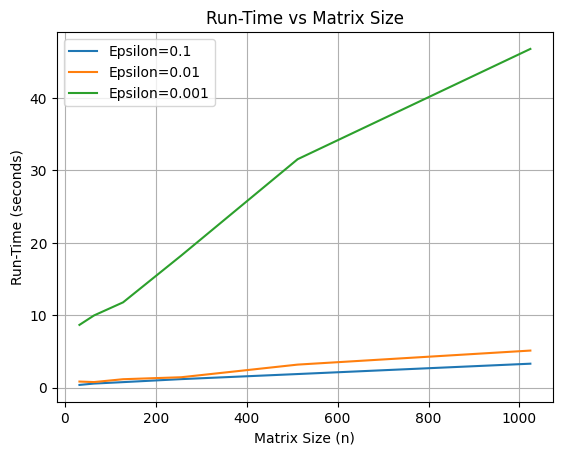

In [8]:
from tqdm import tqdm
import numpy as np
import time
import matplotlib.pyplot as plt

# Matrix sizes and error tolerances
matrix_sizes = [2**i for i in range(5, 11)]  # Sizes: 32, 64, ..., 1024
epsilons = [0.1, 0.01, 0.001]  # Different error tolerances

run_times = []

# Measure run-time for each matrix size and epsilon with tqdm progress bars
for epsilon in tqdm(epsilons, desc="Processing epsilons"):
    times = []
    for size in tqdm(matrix_sizes, desc=f"Matrix sizes for epsilon={epsilon}", leave=False):
        A = np.random.randn(size, 8)  # Fix d=8 for simplicity
        b = np.random.randn(size)
        start_time = time.time()
        x_opt = randLeastSquares(A, b, epsilon)
        end_time = time.time()
        times.append(end_time - start_time)
    run_times.append(times)

# Plot results
for i, epsilon in enumerate(epsilons):
    plt.plot(matrix_sizes, run_times[i], label=f"Epsilon={epsilon}")

plt.xlabel("Matrix Size (n)")
plt.ylabel("Run-Time (seconds)")
plt.title("Run-Time vs Matrix Size")
plt.legend()
plt.grid()
plt.show()


Testing for epsilon=0.1


Epsilon=0.1: 100%|██████████| 5/5 [00:14<00:00,  2.85s/it]


Testing for epsilon=0.01


Epsilon=0.01: 100%|██████████| 5/5 [00:24<00:00,  4.85s/it]


Testing for epsilon=0.001


Epsilon=0.001: 100%|██████████| 5/5 [03:56<00:00, 47.38s/it]


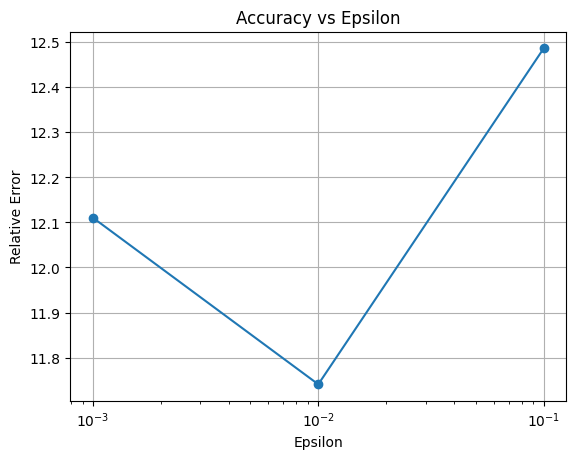

In [7]:
from tqdm import tqdm

accuracies = []

# Measure accuracy for each epsilon
for epsilon in epsilons:
    err = []
    print(f"Testing for epsilon={epsilon}")  # Optional: Display current epsilon
    for _ in tqdm(range(num_tests), desc=f"Epsilon={epsilon}"):  # Add tqdm here
        x_opt = randLeastSquares(A, b, epsilon)
        acc = relative_err(x_opt, x_true)
        err.append(acc)
    accuracies.append(np.mean(err))

# Plot results
plt.plot(epsilons, accuracies, marker='o')
plt.xlabel("Epsilon")
plt.ylabel("Relative Error")
plt.title("Accuracy vs Epsilon")
plt.xscale('log')  # Log scale for epsilon
plt.grid()
plt.show()


In [9]:
modes = ["log", "linear"]
mode_accuracies = []
mode_run_times = []

# Measure accuracy and run-time for each mode
for mode in modes:
    err = []
    times = []
    # Use tqdm to wrap the range for progress tracking
    for _ in tqdm(range(num_tests), desc=f"Processing mode: {mode}"):
        start_time = time.time()
        x_opt = randLeastSquares(A, b, epsilon, mode=mode)
        end_time = time.time()

        acc = relative_err(x_opt, x_true)
        err.append(acc)
        times.append(end_time - start_time)

    mode_accuracies.append(np.mean(err))
    mode_run_times.append(np.mean(times))

# Plot Accuracy Comparison
plt.bar(modes, mode_accuracies)
plt.xlabel("Mode")
plt.ylabel("Average Relative Error")
plt.title("Accuracy: Log vs Linear Mode")
plt.show()

# Plot Run-Time Comparison
plt.bar(modes, mode_run_times)
plt.xlabel("Mode")
plt.ylabel("Average Run-Time (seconds)")
plt.title("Run-Time: Log vs Linear Mode")
plt.show()

Processing mode: log:   0%|          | 0/5 [03:03<?, ?it/s]


KeyboardInterrupt: 

Processing mode: linear: 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]


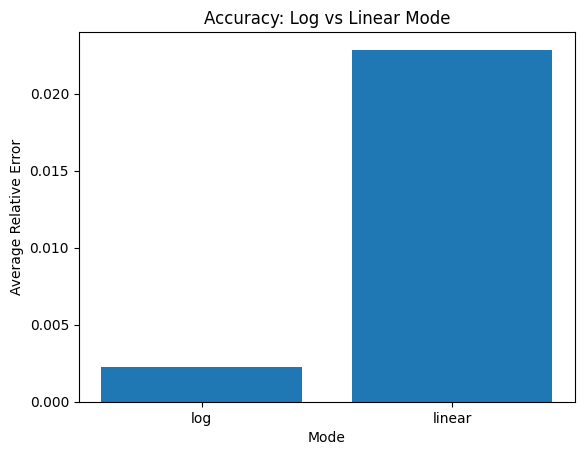

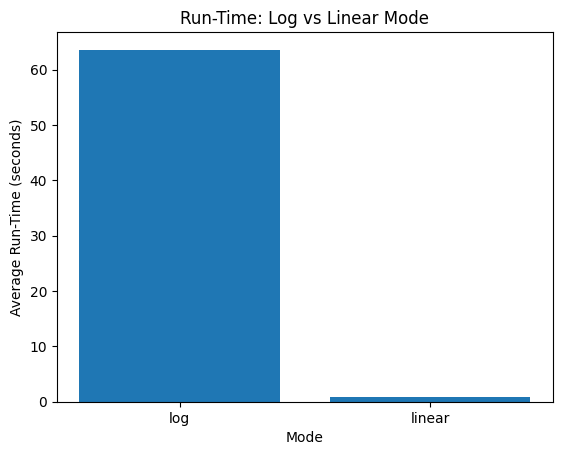

In [10]:
# Analysis with smaller size matrices
# Example usage
modes = ["log", "linear"]
mode_accuracies = []
mode_run_times = []

num_tests = 5
matrix_size = (32, 8)  # Example size
epsilon = 0.01

A = np.random.randn(*matrix_size)
b = np.random.randn(matrix_size[0])
x_true = np.linalg.lstsq(A, b, rcond=None)[0]

# Measure accuracy and run-time for each mode
for mode in modes:
    err = []
    times = []

    for _ in tqdm(range(num_tests), desc=f"Processing mode: {mode}"):
        start_time = time.time()
        x_opt = randLeastSquares(A, b, epsilon, mode=mode)
        end_time = time.time()

        acc = relative_err(x_opt, x_true)
        err.append(acc)
        times.append(end_time - start_time)

    mode_accuracies.append(np.mean(err))
    mode_run_times.append(np.mean(times))

# Plot Accuracy Comparison
plt.bar(modes, mode_accuracies)
plt.xlabel("Mode")
plt.ylabel("Average Relative Error")
plt.title("Accuracy: Log vs Linear Mode")
plt.show()

# Plot Run-Time Comparison
plt.bar(modes, mode_run_times)
plt.xlabel("Mode")
plt.ylabel("Average Run-Time (seconds)")
plt.title("Run-Time: Log vs Linear Mode")
plt.show()

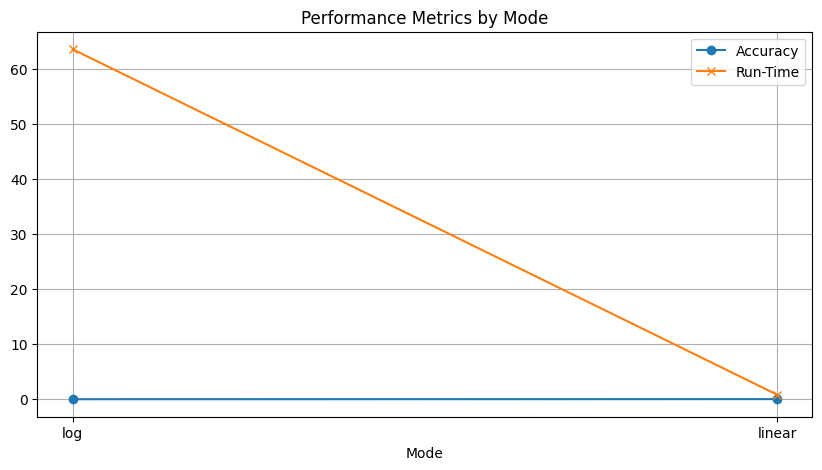

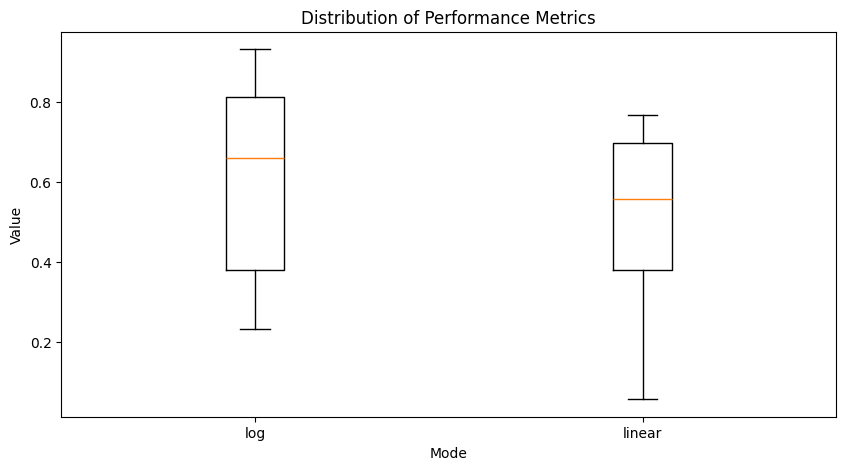

In [11]:
# Line Chart Example
plt.figure(figsize=(10, 5))
plt.plot(modes, mode_accuracies, marker='o', label='Accuracy')
plt.plot(modes, mode_run_times, marker='x', label='Run-Time')
plt.xlabel("Mode")
plt.title("Performance Metrics by Mode")
plt.legend()
plt.grid(True)
plt.show()

# Box Plot Example
data = [np.random.rand(10), np.random.rand(10)]  # Replace with actual relative error/run-time data
plt.figure(figsize=(10, 5))
plt.boxplot(data, labels=modes)
plt.xlabel("Mode")
plt.ylabel("Value")
plt.title("Distribution of Performance Metrics")
plt.show()

In [ ]:
# Additional Analysis

Testing mode: log


log Mode Progress: 100%|██████████| 10/10 [30:29<00:00, 182.92s/it]


Testing mode: linear


linear Mode Progress: 100%|██████████| 10/10 [00:12<00:00,  1.21s/it]


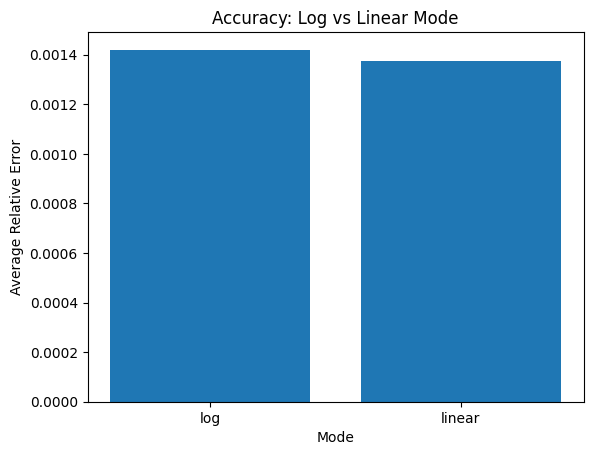

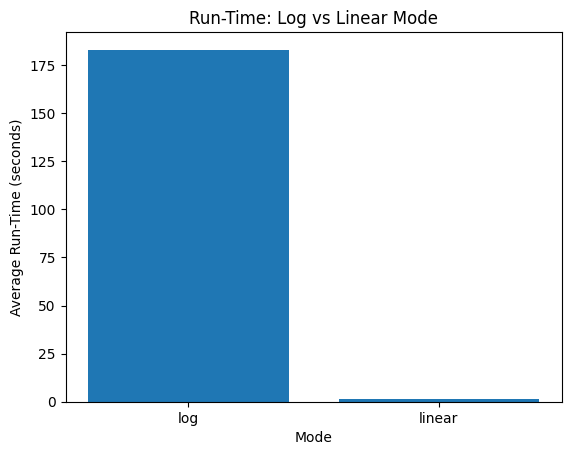

In [8]:
# Parameters for testing
num_tests = 10


# Initialize results storage
mode_accuracies = []
mode_run_times = []

# Compare log vs linear modes
modes = ["log", "linear"]
for mode in modes:
    err = []
    times = []

    print(f"Testing mode: {mode}")

    for _ in tqdm(range(num_tests), desc=f"{mode} Mode Progress"):
        # Generate random test data
        # n, d = 128, 32  # Example size; adjust as needed
        n, d = 64, 16
        A = np.random.randn(n, d)
        x_true = np.random.randn(d)
        b = A @ x_true + 0.01 * np.random.randn(n)
        epsilon = 0.1

        start_time = time.time()
        x_opt = randLeastSquares(A, b, epsilon, mode=mode)
        end_time = time.time()

        acc = np.linalg.norm(x_opt - x_true) / np.linalg.norm(x_true)  # Relative error
        err.append(acc)
        times.append(end_time - start_time)

    mode_accuracies.append(np.mean(err))
    mode_run_times.append(np.mean(times))

# Plot Accuracy Comparison
plt.bar(modes, mode_accuracies)
plt.xlabel("Mode")
plt.ylabel("Average Relative Error")
plt.title("Accuracy: Log vs Linear Mode")
plt.show()

# Plot Run-Time Comparison
plt.bar(modes, mode_run_times)
plt.xlabel("Mode")
plt.ylabel("Average Run-Time (seconds)")
plt.title("Run-Time: Log vs Linear Mode")
plt.show()



Size vs Run-Time Analysis: 100%|██████████| 3/3 [03:47<00:00, 75.99s/it]


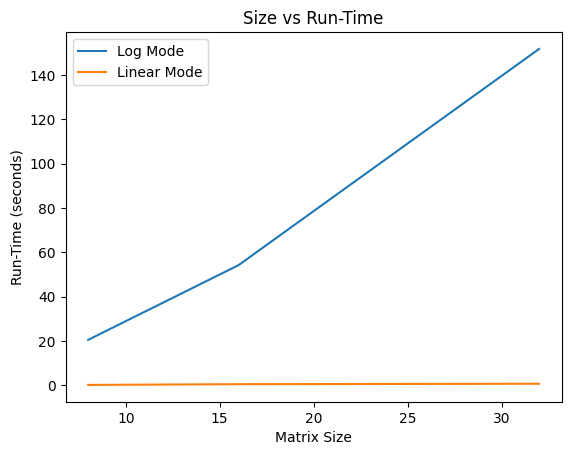

In [9]:
# Additional Analysis: Size vs Run-Time and Accuracy vs Epsilon
size_run_times_log = []
size_run_times_linear = []

dimensions = [8, 16, 32] # dimensions = [64, 128, 256]  # Example sizes for analysis
# Compare log vs linear modes
modes = ["log", "linear"]

for size in tqdm(dimensions, desc="Size vs Run-Time Analysis"):
    A = np.random.randn(size, size // 2).astype(np.float32)
    b = A @ np.random.randn(size // 2) + 0.01 * np.random.randn(size).astype(np.float32)

    for mode in modes:
        start_time = time.time()
        randLeastSquares(A, b, epsilon=0.1, mode=mode)
        end_time = time.time()

        if mode == "log":
            size_run_times_log.append(end_time - start_time)
        else:
            size_run_times_linear.append(end_time - start_time)

plt.plot(dimensions, size_run_times_log, label="Log Mode")
plt.plot(dimensions, size_run_times_linear, label="Linear Mode")
plt.xlabel("Matrix Size")
plt.ylabel("Run-Time (seconds)")
plt.title("Size vs Run-Time")
plt.legend()
plt.show()

Accuracy vs Epsilon Analysis: 100%|██████████| 3/3 [08:38<00:00, 172.69s/it]


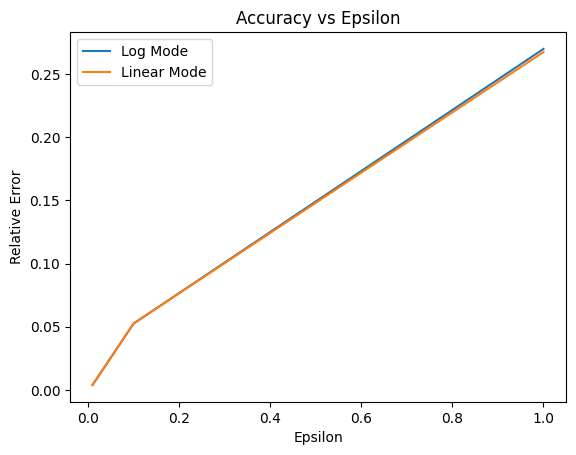

In [6]:
epsilons = [0.01, 0.1, 1]   # Example epsilon values for analysis


# Additional Analysis: Accuracy vs Epsilon Analysis
modes = ["log", "linear"]
epsilon_accuracies_log = []
epsilon_accuracies_linear = []

for eps in tqdm(epsilons, desc="Accuracy vs Epsilon Analysis"):
    A = np.random.randn(32, 18)# A = np.random.randn(128, 64)
    x_true = np.random.randn(18)
    b = A @ x_true + eps * np.random.randn(32)

    for mode in modes:
        x_opt = randLeastSquares(A, b, epsilon=eps, mode=mode)

        acc = np.linalg.norm(x_opt - x_true) / np.linalg.norm(x_true)  # Relative error

        if mode == "log":
            epsilon_accuracies_log.append(acc)
        else:
            epsilon_accuracies_linear.append(acc)

plt.plot(epsilons, epsilon_accuracies_log, label="Log Mode")
plt.plot(epsilons, epsilon_accuracies_linear, label="Linear Mode")
plt.xlabel("Epsilon")
plt.ylabel("Relative Error")
plt.title("Accuracy vs Epsilon")
plt.legend()
plt.show()